<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/CMD_MCD_lenet_64_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!nvidia-smi

Mon Sep  5 22:23:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    48W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [5]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 604, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 604 (delta 48), reused 12 (delta 4), pack-reused 531
Receiving objects: 100% (604/604), 1.11 MiB | 2.50 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [6]:
!cd bnn_hmc && git checkout dropout_wip

Branch 'dropout_wip' set up to track remote branch 'dropout_wip' from 'origin'.
Switched to a new branch 'dropout_wip'


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl (189.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [9]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/cmd/ \
--dataset_name=cmd --scaling=asinh --builder_kwargs='{"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}' \
--model_name=lenet_dropout --init_step_size=1e-7 --num_epochs=100 --eval_freq=5 \
--batch_size=100 --image_size 64 --save_freq=5 --optimizer=SGD --train_split=train[:90%] --test_split=train[90%:95%] \
--patience 50 --dropout_rate 0.1

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Starting from random initialization with provided seed
/content/bnn_hmc/bnn_hmc/utils/script_utils.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_set, key))
/content/bnn_hmc/bnn_hmc/utils/script_utils.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, train_set, key))
---  --------  ----------

In [10]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/cmd/ \
--dataset_name=cmd --scaling=asinh --builder_kwargs='{"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}' \
--model_name=lenet_dropout --init_step_size=1e-7 --num_epochs=100 --eval_freq=5 \
--batch_size=100 --image_size 64 --save_freq=5 --optimizer=SGD --eval_split=train[95%:] \
--patience 10 --dropout_rate 0.1 --repeats 10

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_sgd.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_set, key))
{'scaled_nll': -1.5971417427062988, 'scaled_mse': 0.0029247996862977743, 'scaled_rmse': 0.05408141719942049, 'nll': -1.5971417427062988, 'mse': 0.0029247996862977743, 'rmse': 0.05408141719942049}


In [11]:
for i, root in enumerate(glob.glob('/content/runs/sgd/cmd/*/test_set*npy')):
  data = np.load(root)
for i, root in enumerate(glob.glob('/content/runs/sgd/cmd/*/ensemble_predictions*npy')):
  ensemble_predictions = np.load(root)

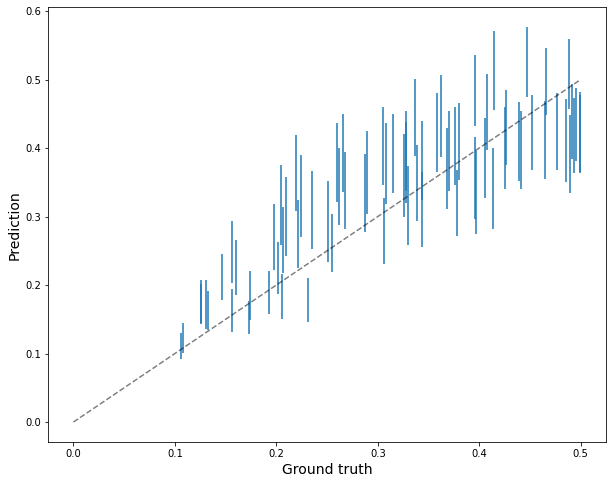

In [12]:
plt.figure(figsize=(10,8))
plt.errorbar(data[0,::10,0], ensemble_predictions[0,::10,0], ensemble_predictions[0,::10,1],  ls='none')
plt.plot(np.linspace(0,0.5,10), np.linspace(0,0.5,10), linestyle='--', color='black', alpha=0.5)
plt.xlabel('Ground truth', fontsize=14)
plt.ylabel('Prediction', fontsize=14)
plt.show()